In [88]:
from __future__ import print_function
import os
from time import time
from os import listdir
from os.path import isdir

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
SPINE_COLOR = 'gray'

%matplotlib inline



/home/doaa/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [89]:
# Constants
NUM_TOPICS = 10
base_dir = '/home/doaa/Documents/Spring2016_SE_Project/'
max_df = 0.7
min_df = 0.3
# suffix = str(max_df)+'_'+str(min_df) # for 10
lang = 'categories_fixed_'
# lang = 'all_'
# lang = ''

suffix = lang + str(NUM_TOPICS)+'_'+str(max_df)+'_'+str(min_df)
print(suffix)

categories_fixed_10_0.7_0.3


In [90]:
proj_topic = pd.read_csv(os.path.join(base_dir, 'results/project-topic_'+suffix+'.csv'),
                             index_col=0)
#  normalize values
for i in proj_topic.index:
    proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]] = \
                proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]]\
                    / (proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]].max())
# To date
proj_topic.date = pd.to_datetime(proj_topic.date)
proj_topic.sort_values('date', inplace=True)
print(proj_topic.shape)
proj_topic.head()

(106, 12)


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,project,date
index,,,,,,,,,,,,
0hh1,0.000040,1.000000,0.036886,0.168486,2.833255e-02,4.023518e-05,0.397630,0.000040,0.000040,0.000040,0hh1,2016-01-01
oryx,0.000005,0.000005,0.000005,1.000000,1.796732e-02,6.145838e-01,0.000005,0.000005,0.000005,0.010188,oryx,2016-01-01
openage,0.000016,0.047340,0.075629,0.143267,1.804724e-01,1.639160e-05,1.000000,0.000016,0.320174,0.001464,openage,2016-01-01
nupic,0.000243,0.018537,0.274313,1.000000,9.312631e-07,9.312607e-07,0.105727,0.000527,0.005452,0.160423,nupic,2016-01-01
neovim,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,neovim,2016-01-01


In [91]:
topics = pd.read_csv(os.path.join(base_dir, 'results/topic_word_'+suffix+'.csv'), index_col=0)
topics_freq = pd.read_csv(os.path.join(base_dir, 'results/topic_word_freq_'+suffix+'.csv'), index_col=0)

topics.head(10)

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16,word17,word18,word19,word20,word21,word22,word23,word24,word25,word26,word27,word28,word29,word30,word31,word32,word33,word34,word35,word36,word37,word38,word39,word40,word41,word42,word43,word44,word45,word46,word47,word48,word49
topic#0,0x,proxi,js,0x00,0x3,wrong,arg1,uint32,physic,cp,touch,softwar,anim,button,func,enumer,widget,scene,nativ,tile,perman,eas,program,cc,constraint,draw,proto,transit,menu,rect,cast,scroll,reader,box,stub,audio,bool,slider,arg2,shape,obj,c0,rotat,0x80,vertex,ff,int32,cf,0x10,0x01
topic#1,editor,elem,cursor,prototyp,word,menu,indent,regex,widget,fold,scroll,session,whitespac,button,highlight,selector,trace,pane,po,keyword,dialog,edit,dict,promis,hint,tab,softwar,bracket,modul,func,focu,dom,marker,icon,atom,defer,spec,css,ctrl,lang,expr,mous,plugin,builtin,outlin,packag,border,hook,dir,mirror
topic#2,chart,axi,seri,categori,tick,shape,axe,draw,pixel,angl,zoom,coordin,canva,rect,anim,stroke,extent,radiu,coord,plot,geometri,grid,figur,tooltip,opac,legend,wiki,measur,polygon,prototyp,marker,dataset,2009,box,edg,interpol,dimens,border,rotat,clip,transit,month,day,bar,bbox,min,symbol,domain,2015,visual
topic#3,vector,matrix,shape,kernel,train,int32,spars,num,predict,devic,score,cluster,apach,col,sequenc,blob,graph,batch,op,estim,grad,dim,toler,assert,softwar,elem,metric,classifi,dimens,scalar,distanc,learn,thread,doubl,infer,gradient,job,seed,dict,stride,loss,optim,alloc,chunk,recommend,dataset,conf,pool,writabl,near
topic#4,summari,0x,ff,asset,graphic,game,entiti,vertex,assert,matrix,resourc,devic,assembl,draw,pixel,button,rectangl,materi,dispos,bitmap,packag,scene,mixin,light,primit,softwar,vector,rotat,metadata,sound,plugin,servic,platform,blend,profil,enumer,region,ptr,audio,dictionari,2014,term,box,bit,vertic,channel,stage,mous,descriptor,anim
topic#5,assert,factori,java,apach,annot,transact,session,resourc,mock,web,obtain,true,complianc,govern,basi,loader,agre,permiss,unless,proxi,warranti,logger,entiti,servic,builder,softwar,reader,abstract,2002,illeg,templat,io,descriptor,socket,spring,persist,server,holder,xml,accessor,processor,matcher,invoc,invok,synchron,writer,destin,interfac,lang,registri
topic#6,num,po,def,world,player,draw,volum,game,team,high,scene,tile,water,cell,vertex,face,owner,anim,vector,button,radiu,mod,min,widget,vec,mous,resourc,cur,ground,dir,vertic,sound,desc,squar,light,softwar,tick,materi,icon,attack,distanc,spring,sync,inst,func,damag,matrix,power,quad,angl
topic#7,ff,face,0000,bb,href,b2,nbsp,matrix,vector,kernel,rect,keyword,pixel,thread,mem,contact,decor,graph,alloc,anchor,train,rectangl,pool,edg,cast,scalar,tab,shape,border,distanc,emitt,entropi,bit,ul,zone,swap,assert,xhtml,softwar,tran,sequenc,deseri,draw,problem,chunk,compress,address,mutex,optim,jpeg
topic#8,softwar,ptr,shape,collis,materi,vertex,bit,dom,devic,asset,light,func,scene,face,num,warranti,ctrl,constraint,mask,notic,physic,redistribut,vector,world,glyph,alloc,extent,disclaim,profil,rect,matrix,edg,address,axi,heap,vertic,pixel,damag,anim,0x00,min,permiss,draw,liabil,rotat,printf,triangl,thread,contact,assert
topic#9,assert,server,rout,session,databas,templat,interfac,password,email,address,servic,articl,dict,migrat,python,true,auth,cooki,datetim,plugin,entiti,dir,rais,person,softwar,choic,unicod,lang,app,account,constraint,host,secur,login,schema,topic,domain,redirect,usernam,packag,hello,bundl,builder,fixtur,driver,authent,book,doctyp,func,environ


In [92]:
topics_freq.head(10)

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16,word17,word18,word19,word20,word21,word22,word23,word24,word25,word26,word27,word28,word29,word30,word31,word32,word33,word34,word35,word36,word37,word38,word39,word40,word41,word42,word43,word44,word45,word46,word47,word48,word49
topic#0,138703.015465,25335.293952,14707.419200,10928.227914,9395.337402,9197.067742,8303.313799,7803.013538,7390.075674,7260.163424,6657.434066,6596.700613,6548.679067,6418.452243,6254.357807,6140.396124,6043.161434,5383.298242,5332.089497,5302.027141,4922.908497,4900.830542,4895.047550,4796.868928,4518.169423,4502.268375,4433.838334,4375.230633,4305.456144,4278.317872,4252.799354,4145.980530,4112.097796,3900.430929,3886.221125,3707.303358,3706.138054,3705.472387,3689.260052,3507.622757,3376.186881,3359.120667,3297.516676,3290.836430,3216.064568,3173.947781,3095.274933,3029.677461,2991.049808,2919.700073
topic#1,28817.955840,21568.413328,21519.694410,18536.091080,18445.646051,16079.523687,13852.858853,12713.055843,12048.885144,11413.011559,11223.335584,11164.061000,10044.724901,9941.630479,9856.183569,9079.680613,9024.033515,8733.794474,8567.616427,8364.302309,8001.254258,7832.706139,7826.912822,7481.158034,7311.603449,7203.353063,6840.044075,6826.872382,6664.385210,6157.089230,5973.814163,5959.413613,5922.159088,5395.603517,5391.703057,5333.285352,5279.895457,5093.842075,4985.287864,4951.069886,4904.447636,4815.077625,4726.703634,4725.537596,4720.006467,4611.562765,4390.996678,4335.341293,4169.681865,4085.769722
topic#2,32531.750434,32492.735954,24464.310673,11100.926891,10775.339967,9657.745201,9037.621733,8194.302356,7403.230242,7355.023333,7080.034677,6757.606609,6619.257959,6553.145124,6435.542003,6251.774093,6107.697698,6018.675907,6007.101748,5996.017605,5967.610204,5665.604950,5650.423288,5196.235068,5175.878318,5152.161754,5135.745315,4987.444865,4897.273255,4719.902783,4540.048836,4486.037828,4392.768361,4222.285777,4137.633570,4083.587420,4053.588835,3990.565499,3970.421268,3899.200724,3860.997358,3504.773167,3439.389843,3427.040928,3335.702203,3290.817623,3138.623173,3129.354264,3087.969262,3054.013115
topic#3,42757.310047,32381.313686,27194.339959,20457.398689,20208.256599,17575.606283,13301.575085,12935.363464,12763.021875,11715.035352,10997.486813,10524.953627,10437.244583,9498.549559,8168.450257,7906.084239,7889.908187,7641.704982,7613.873713,7446.084249,7430.150221,7400.430135,7226.414783,7164.403341,7039.085821,6849.168136,6829.877655,6774.335834,6378.241805,6091.157111,6037.899496,6002.590165,5985.257671,5540.306717,5527.194841,5487.989638,5278.085800,5148.339309,5130.945935,5042.760876,5002.893321,4922.098364,4913.944969,4861.369602,4786.255577,4649.572066,4516.398816,4401.480376,4376.767324,4375.555781
topic#4,63264.811724,19910.321890,16595.379181,14897.758443,14301.289681,14287.979668,12261.220737,10871.420423,10184.234109,10034.337293,9713.487816,8986.658878,8697.538708,8533.447777,8141.427403,7328.359020,7291.005632,6366.695934,6355.149560,6087.598811,5769.503330,5135.586450,5134.409783,5001.880410,4960.452284,4879.649363,4822.655967,4518.532152,4370.800616,4352.881730,4154.267623,3961.338323,3823.716334,3790.824813,3783.331122,3732.642854,3659.952439,3594.880062,3564.186349,3523.417981,3394.665307,3371.486681,3364.901726,3326.269807,3250.676157,3228.758455,3218.250824,3181.980060,3168.225509,3112.545654
topic#5,51776.502024,37315.070099,27845.786099,24368.413047,23985.728970,21123.504039,20476.923439,19940.920624,15014.475873,11742.063935,9930.348824,9910.967630,9846.700458,9637.086409,9491.103516,9141.976737,9064.507277,8983.886678,8983.709837,8673.204310,8219.881172,8111.457270,8056.046720,7996.053345,7877.248089,7844.345889,5950.478591,5943.246184,5905.419321,5847.854998,5702.141528,5521.167627,5454.914061,5422.318062,5130.265585,5119.045603,4725.982047,4681.698474,4657.211209,4636.208247,4588.406939,4554.798967,4546.255644,4544.192534,4512.305547,4484.200340,443

ValueError: num must be 1 <= num <= 6, not 7

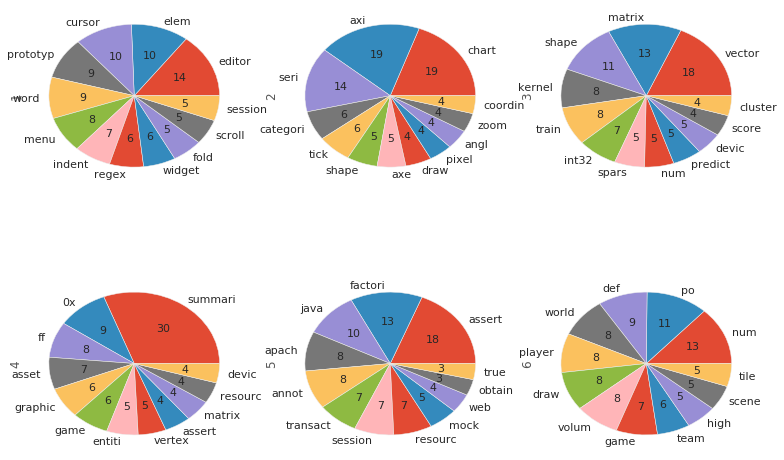

In [93]:
fig = plt.figure(1, figsize=(13,8))

df = topics_freq.reset_index(level=0)
df = df.drop('index', axis=1).T[0:12]
df
for i in range(1,NUM_TOPICS):
    ax = fig.add_subplot(2,3,i)
    df[i].astype(float).plot.pie(ax=ax, label=None, fontsize=11,
                    labels=topics.T.ix[0:12, i], autopct='%.d')
plt.tight_layout()
fig.savefig('topic-word'+suffix+'.png', bbox_inches='tight', dpi=400)

In [ ]:
latests_projects = proj_topic[proj_topic.date == "2016-01-01"].copy()
to_remove = ['express', 'derby', 'flask', 'symfony']
latests_projects = latests_projects[~latests_projects.project.isin(to_remove)]

# latests_projects[latests_projects.columns[0:NUM_TOPICS]] = latests_projects[latests_projects.columns[0:NUM_TOPICS]].applymap(lambda x: 0 if x>0.99 else x*100)
# latests_projects

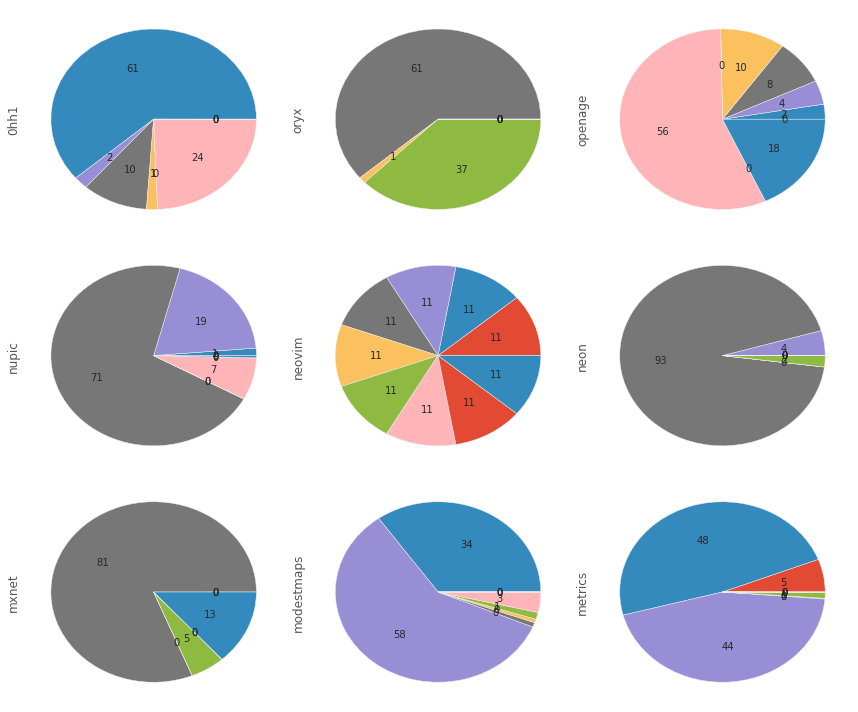

In [94]:
fig = plt.figure(1, figsize=(12,10))

df = latests_projects.reset_index(level=0)
df.set_index('project', inplace=True)
df = df.drop('index', axis=1).T[0:NUM_TOPICS-1]
df
for i in range(1,10):
    ax = fig.add_subplot(3,3,i)
    df.ix[:, i-1].astype(float).plot.pie(ax=ax, autopct='%.d',
                    labels=None#df.index.values
                                )

# h, l = ax.get_legend_handles_labels()
# plt.figlegend(h, df.index.values, loc='lower center',  ncol=5, bbox_to_anchor=(0.4, 0.02))
    
plt.tight_layout()
plt.savefig('project-topic'+suffix+'.png', dpi=400)


# 1- Each project evolution over time

101
0hh1 (1, 12)


/home/doaa/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


2048 (1, 12)
AtomicGameEngine (1, 12)
BEMSimpleLineGraph (1, 12)
BrowserQuest (1, 12)
CNTK (1, 12)
Caret (1, 12)
Chart.js (1, 12)
Dash (1, 12)
Decider (1, 12)
GD (1, 12)
GamePlay (1, 12)


/home/doaa/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


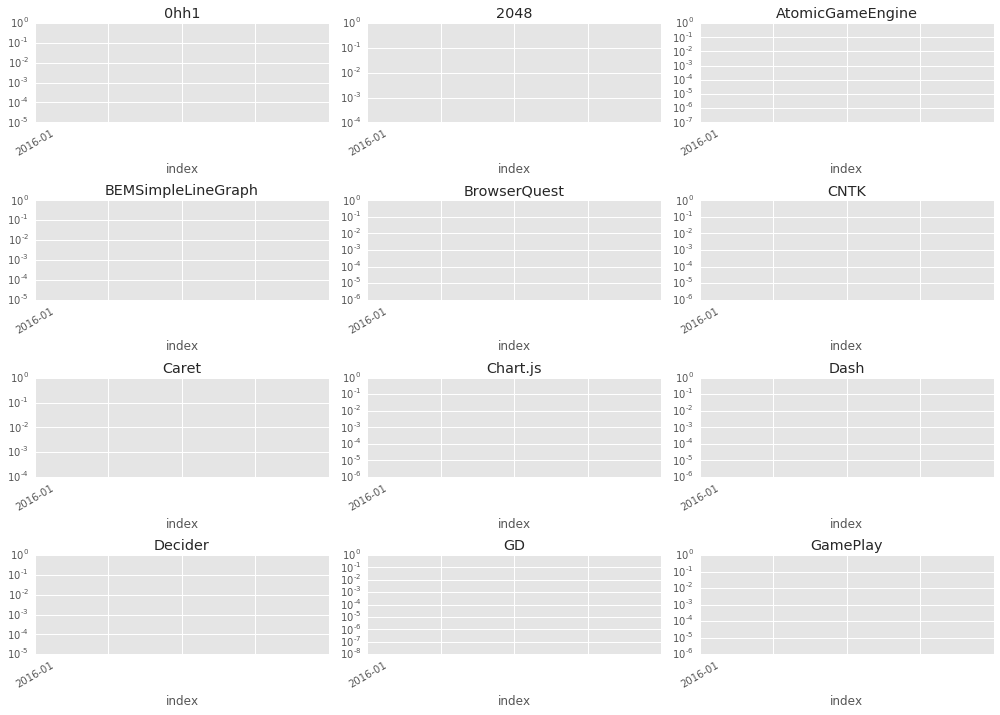

In [95]:
#Remove projects with unsuffient data
fig = plt.figure(3, figsize=(14,10))
# to_remove = ['express', 'derby', 'flask', 'CodeIgniter']
temp = proj_topic#[~proj_topic.project.isin(to_remove)]
proj_topic.shape

groups = temp.groupby('project')

i=1
print(groups.ngroups)
for name, p in groups:    
    ax = fig.add_subplot(4,3,i)
    i+=1
    ax = p[proj_topic.columns[0:NUM_TOPICS]].plot(logy=True, ax=ax)
    ax.set_xticklabels(p['date'].dt.strftime( "%Y-%m"))
    if p.shape[0] >10:
        ax.set_xticklabels([c for o,c in enumerate(p['date'].dt.strftime( "%Y-%m")) if o%2!=0])
        ax.set_xticks(np.arange(0, p.shape[0], 2))
    else:
        ax.set_xticklabels(p['date'].dt.strftime( "%Y-%m"))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30)
    ax.set_title(name)
    ax.legend([])
    print(name, p.shape)
    if i==13:
        break

plt.tight_layout()
fig.savefig('project_time'+suffix+'.png', dpi=350)

In [96]:
# proj_topic[proj_topic['project']=='django']


In [97]:
# proj_topic

In [98]:
# groups = proj_topic.groupby('date')#.sum()

# for i, g in groups:
#     print(i, g.sum())
# ax = groups.plot()
# ax.legend(bbox_to_anchor=(1.3, 1))
# ax.set_yticklabels([])
# ax.set_ylabel('density')

(1, 10)


/home/doaa/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735964.0, right=735964.0
  'left=%s, right=%s') % (left, right))


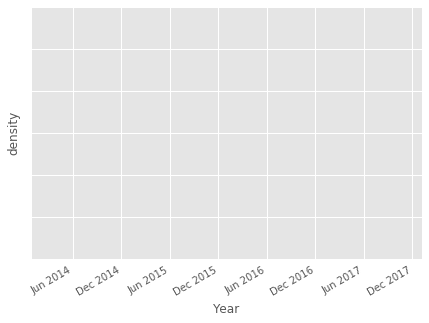

In [99]:
fig = plt.figure(5)
groups = proj_topic.groupby('date').mean()
print(groups.shape)

ax = groups.plot(figsize=(7,5))
# ax.legend(bbox_to_anchor=(1.25,.9))
ax.legend([])
ax.set_yticklabels([])
ax.set_ylabel('density')
ax.set_xlabel('Year')

# plt.tight_layout()
plt.savefig('topic_time'+suffix+'.png', bbox_inches='tight', dpi=350)

In [100]:

# proj_topic[proj_topic.date=='2016-01-01']

In [101]:
# f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
# for i, k in enumerate([0, 5, 9, 14, 19]):
#     ax[i].stem(topics.ix[k,:], linefmt='b-',
#                markerfmt='bo', basefmt='w-')
#     ax[i].set_xlim(-50,4350)
#     ax[i].set_ylim(0, 0.08)
#     ax[i].set_ylabel("Prob")
#     ax[i].set_title("topic {}".format(k))

# ax[4].set_xlabel("word")

# plt.tight_layout()


In [102]:
# df = proj_topic[proj_topic.date=='2016-01-01']


# f, ax= plt.subplots(7, 1, figsize=(8, 12), sharex=True)
# for i in range(7):
#     ax[i].stem(df.ix[i,0:10], linefmt='r-',
#                markerfmt='ro', basefmt='w-')
#     ax[i].set_xlim(-1, 21)
#     ax[i].set_ylim(0, 1)
#     ax[i].set_ylabel("Prob")
#     ax[i].set_title("{}".format(df.ix[i,10]))

# ax[6].set_xlabel("Topic")

# plt.tight_layout()
# plt.show()
# plt.savefig('project_topc'+suffix+'.png', bbox_inches='tight', dpi=350)

In [111]:
proj_topic.head()
# df = proj_topic[proj_topic.date=='2016-01-01']

# a = {}
# for i in range(NUM_TOPICS):
#     a[i] = df[df.ix[:,i]>0.8].project#.ix[:, 10:12]
#     print(len(a[i]))
#     a[i] = np.unique(a[i])
# a


NameError: name 'get_projects_data' is not defined

# Clustering Analysis

In [104]:
projects_details = pd.read_csv(os.path.join(base_dir, 'results/projects_details.csv'), index_col=0)
# projects_details.rename(columns={'index': 'project'}, inplace=True)
                               

/home/doaa/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


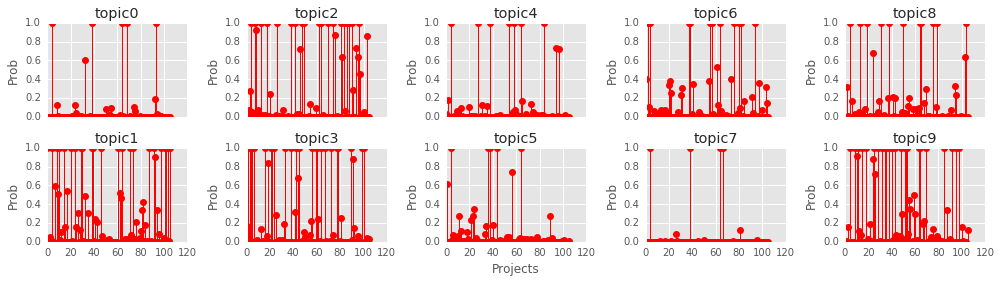

In [105]:
df = proj_topic[proj_topic.date=='2016-01-01']


f, ax= plt.subplots(2, 5, figsize=(14, 4), sharex=True)
for i in range(NUM_TOPICS):
    x = i%2
    y = int(i/2)
    ax[x][y].stem(df.ix[:,i], linefmt='r-',
               markerfmt='ro', basefmt='w-')
#     ax[x][y].set_xlim(-1, 21)
    ax[x][y].set_ylim(0, 1)
    ax[x][y].set_ylabel("Prob")
    ax[x][y].set_title("{}".format(df.columns[i]))

ax[x][y/2].set_xlabel("Projects")

plt.tight_layout()

plt.savefig('topic_projects'+suffix+'.png', bbox_inches='tight', dpi=350)

Data Visulization
Games Engines
Machine Learning
Text Editor
Web Framework
Web Games


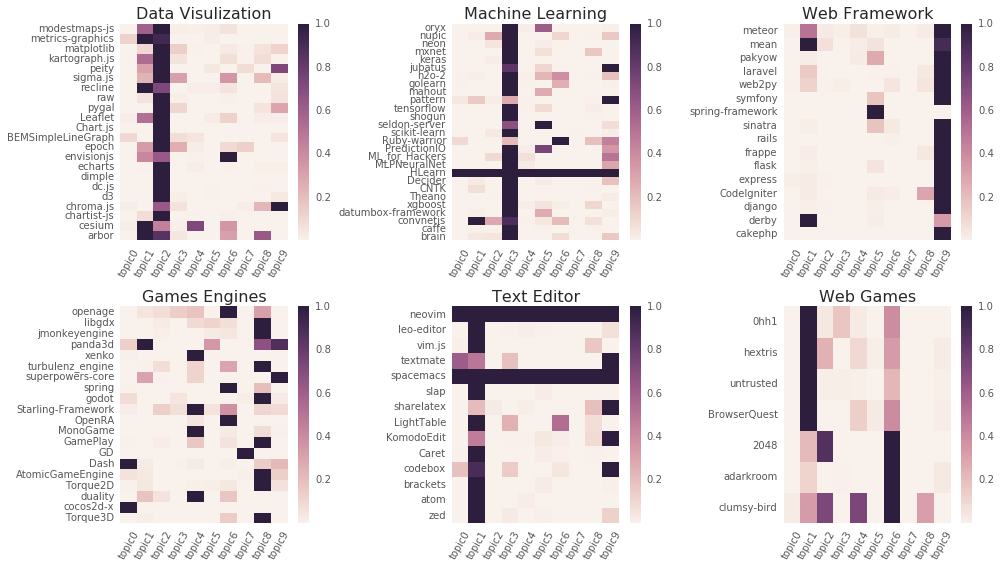

In [106]:
import seaborn as sns

# to_remove =  ['neovim', 'mxnet', 'xenko', 'turbulenz_engine', 'textmate', 'tensorflow', 'superpowers-core',
#              'spacemacs', 'sharelatex', 'raw', 'OpenRA', 'MonoGame', 'ML_for_Hackers', 'MLPNeuralNet', 
#              'HLearn', 'BEMSimpleLineGraph', 'duality', 'chroma.js', 'atom']


projects = pd.merge(projects_details, proj_topic, right_index=True, left_index=True)
projects.reset_index(inplace=True)
df = projects#[~projects['index'].isin(to_remove)]
df.set_index('index', inplace=True)
categories = df.groupby('group')
categories.ngroups

f, ax= plt.subplots(2, 3, figsize=(14, 8))#, sharex=True)
   
for i, (name, g) in enumerate(categories):
    x = i%2
    y = int(i/2) 
    print(name)
    sns.heatmap(g.ix[:,2:NUM_TOPICS+2], ax=ax[x][y])#, cmap="RdBu_r", cbar=False)
    ax[x][y].set_title(name, fontsize=16)
    ax[x][y].set_ylabel('')
    labels = ax[x][y].get_xticklabels()
    plt.setp(labels, rotation=60)
    
plt.tight_layout()

plt.savefig('topic_projects_heatmap'+suffix+'.png', bbox_inches='tight', dpi=350)

In [107]:


projects['sum'] = projects.ix[:,2:2+NUM_TOPICS].sum(axis=1)
projects['type'].unique()

array(['JavaScript', 'Java', 'C++', 'Python', 'VimL', 'Ruby', 'PHP', 'Go',
       'HTML', 'C#', 'C', 'TypeScript', 'Emacs Lisp', 'CoffeeScript',
       'ActionScript', 'Scala', 'R', 'Objective-C', 'Clojure', 'Haskell',
       'D', 'CSS'], dtype=object)

In [108]:
x = projects[projects['sum'] >8]
print(x.shape)
x#.index
# x.index

(3, 15)


,group,type,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,project,date,sum
index,,,,,,,,,,,,,,,
neovim,Text Editor,VimL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,neovim,2016-01-01,10.0
spacemacs,Text Editor,Emacs Lisp,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,spacemacs,2016-01-01,10.0
HLearn,Machine Learning,Haskell,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,HLearn,2016-01-01,10.0


In [225]:
types = projects['type'].unique()
groups = projects['group'].unique()
df = pd.DataFrame(
    columns=["JavaScript", "Ruby", "Java", "C++", "C", "Python", "PHP", "C#", "Ruby", "Others"])
for d in projects.index:
    df.loc[] = 

,JavaScript,Ruby,Java,C/C++,Python,PHP,C#,Ruby,Others


In [314]:
groups = df.groupby('group')

for i, g in groups:
    print(str(i) + ': ' + str(g.shape[0]))

Data Visulization: 19
Games Engines: 14
Machine Learning: 22
Text Editor: 9
Web Framework: 16
Web Games: 7


In [315]:
df.shape[0]

87